In [1]:
import os
import numpy as np
import mne
import osl
import yaml
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
outdir = os.path.join('rich_data', 'subj2', 'sess4', 'oslpy_deb_eeg')

In [16]:
dataset = {}
path = os.path.join(outdir, 'task_part1_4_tsss_preproc_raw.fif')
raw = mne.io.read_raw_fif(path, preload=True)
path = os.path.join(outdir, 'task_part1_4_raw_tsss_ica.fif')
ica = mne.preprocessing.read_ica(path)

Opening raw data file rich_data/subj2/sess4/oslpy_deb_eeg/task_part1_4_tsss_preproc_raw.fif...
    Range : 58000 ... 1401999 =     58.000 ...  1401.999 secs
Ready.
Opening raw data file /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/task_part1_4_tsss_preproc_raw-1.fif...
    Range : 1402000 ... 2745999 =   1402.000 ...  2745.999 secs
Ready.
Opening raw data file /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/task_part1_4_tsss_preproc_raw-2.fif...
    Range : 2746000 ... 2914999 =   2746.000 ...  2914.999 secs
Ready.
Reading 0 ... 2856999  =      0.000 ...  2856.999 secs...
Reading rich_data/subj2/sess4/oslpy_deb_eeg/task_part1_4_raw_tsss_ica.fif ...
Now restoring ICA solution ...
Ready.


In [17]:
ch_dict = dict([(ch, i) for i, ch in enumerate(raw.ch_names)])

In [19]:
selected_chs = ['MEG1213', 'MEG0612', 'MEG0423', 'MEG2322', 'MEG0232', 'MEG2612', 'MEG2532', 'MEG0722', 'MEG1143', 'MEG1022', 'MEG0513', 'MEG1212',
                'MEG0743', 'MEG1723', 'MEG2012', 'MEG1613', 'MEG2042', 'MEG2523', 'MEG1832', 'MEG1543', 'MEG2333', 'MEG1443', 'MEG1943', 'MEG0533']

selected_inds = []
for ch in selected_chs:
    selected_inds.append(ch_dict[ch])
    
selected_inds = [str(i) for i in selected_inds]
print(','.join(selected_inds))

203,136,116,337,94,370,364,151,200,181,125,202


In [12]:
raw = ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 4 ICA components
    Projecting back using 56 PCA components


In [4]:
raw.info['bads']

['EEG025', 'EEG035', 'EEG036', 'EEG037']

In [13]:
raw = raw.drop_channels(raw.info['bads'])

Using matplotlib as 2D backend.
Opening raw-browser...


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

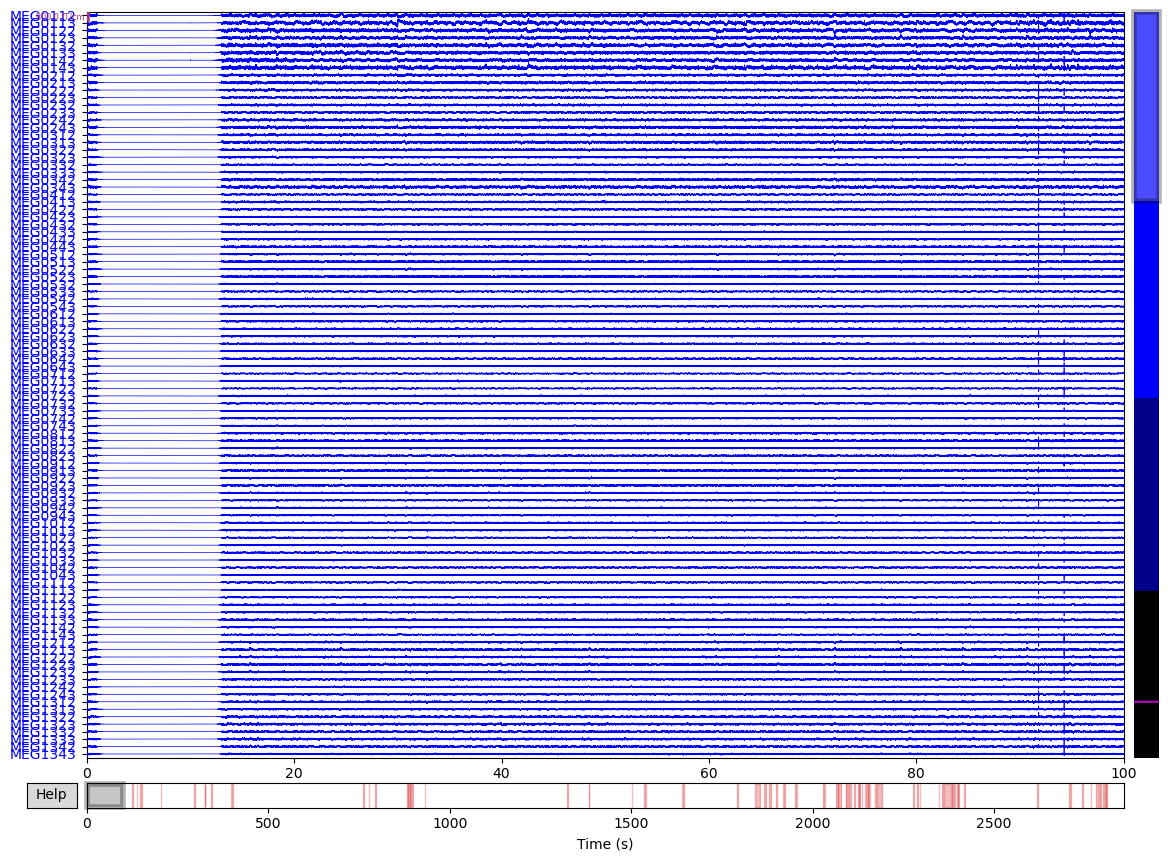

In [14]:
%matplotlib widget
raw.plot(duration=100, n_channels=100)

In [15]:
ica.save(os.path.join(outdir, 'ica.fif'))
raw.save(os.path.join(outdir, 'raw.fif'))

Writing ICA solution to /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/ica.fif...
Writing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw.fif


/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_18443/348801108.py:1: RuntimeWarning: This filename (rich_data/subj2/sess4/oslpy_deb_eeg/ica.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(os.path.join(outdir, 'ica.fif'))


Overwriting existing file.
Writing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw-1.fif
Overwriting existing file.
Writing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw-2.fif
Closing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw-2.fif
Closing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw-1.fif
Closing /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/subj2/sess4/oslpy_deb_eeg/raw.fif
[done]


In [5]:
ica_sources = ica.get_sources(raw).get_data()

In [6]:
ica.exclude

[0, 5, 1, 9]

In [11]:
%matplotlib widget
plt.plot(ica_sources[9][40000:60000], linewidth=0.2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

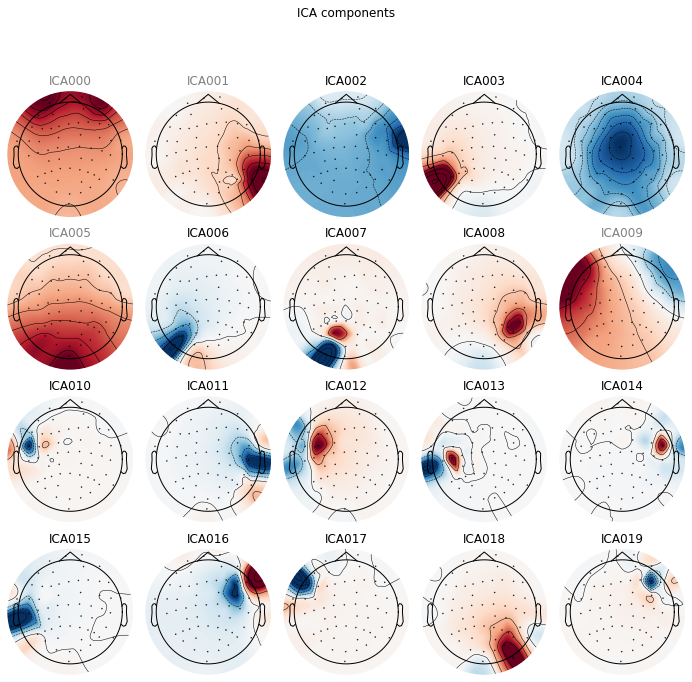

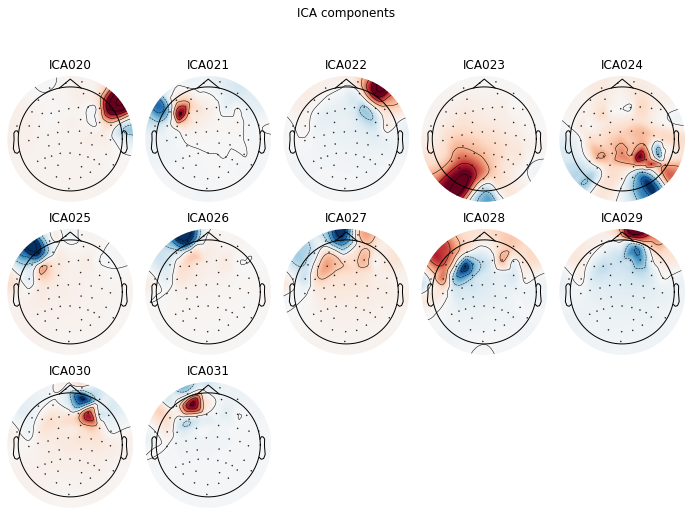

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x526.68 with 12 Axes>]

In [7]:
ica.plot_components()